# eda

### 00 | loading in data and libraries

In [1]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
path = r'/Users/johntam/cf_data_analysis/tasks/A6/code'

eu_data = pd.read_csv(os.path.join(path,'eu_data.csv'))

In [7]:
# creating a subset for eda

eda_data = eu_data.drop(['lat','lng'], axis=1)

### 01 | visualizations

In [29]:
# aesthetic settings
sns.set_style('white')
sns.set_palette('coolwarm')
sns.despine()

<Figure size 640x480 with 0 Axes>

/var/folders/6p/dg2x5f3j5clbf9xgg9xqfxjh0000gn/T/ipykernel_24174/1193221661.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(eda_data.corr(), annot = True, ax = ax)


<AxesSubplot: >

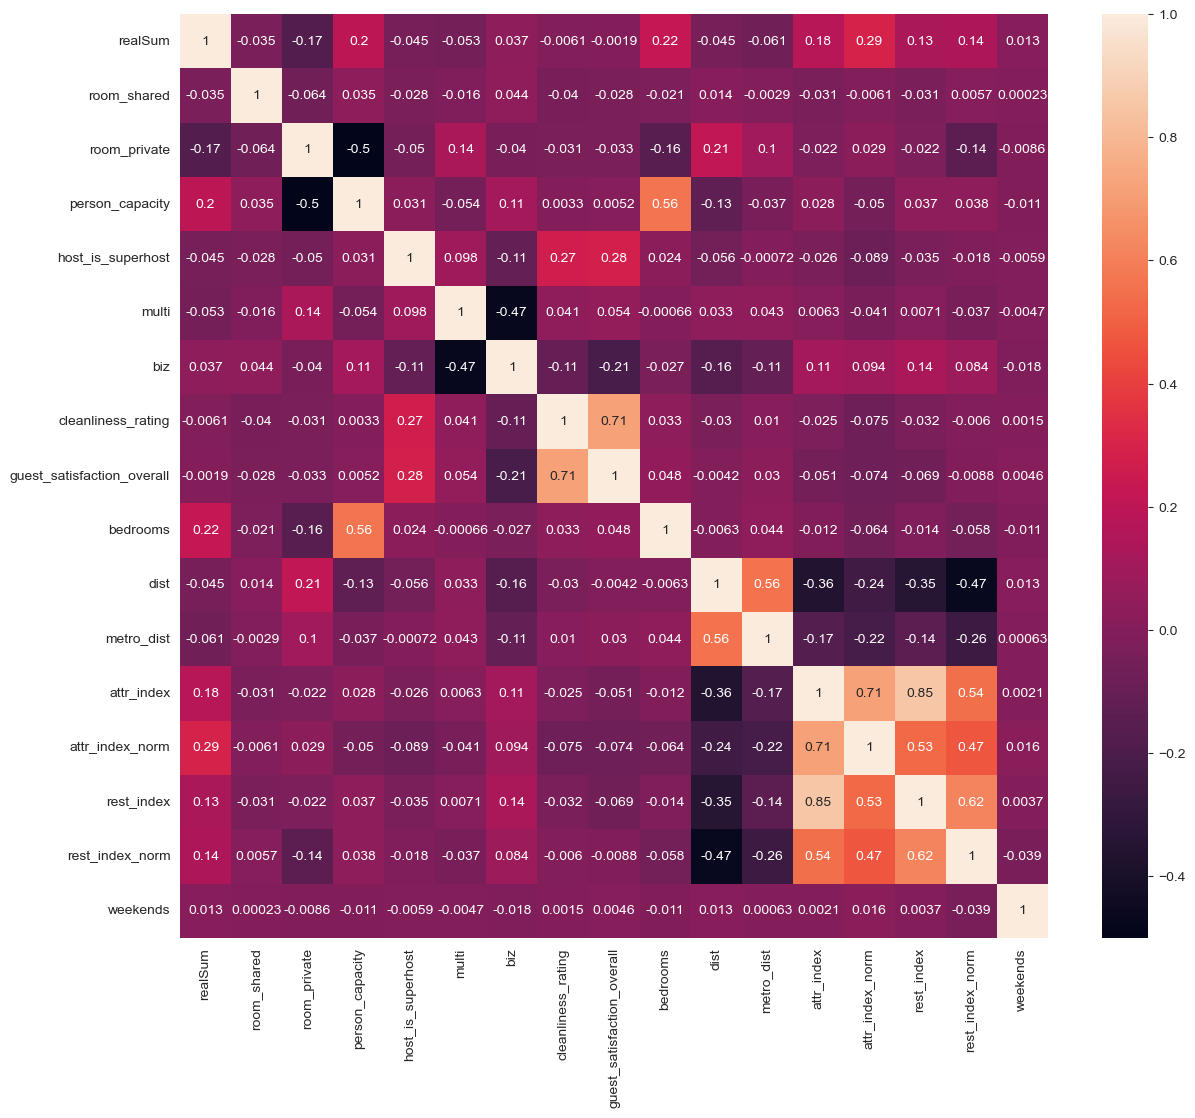

In [24]:
# correlation heat map 

f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(eda_data.corr(), annot = True, ax = ax)

###### it looks like we will have to watch the following pairs: (cleanliness_rating, guest_satisfaction_overall),(person_capacity,room_private),(rest_index,attr_index),(person_capacity,bedrooms),(multi,biz) and (dist,rest_index_norm) due to high absolute correlation coefficient

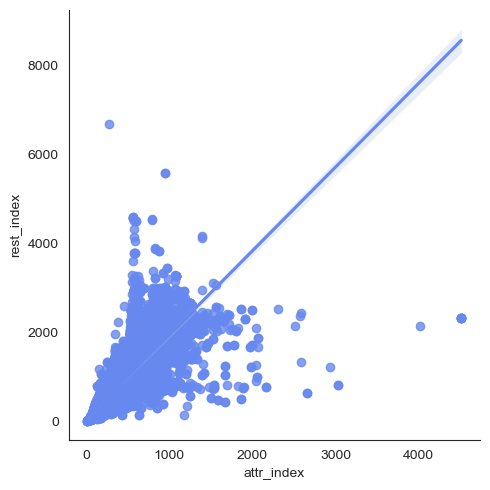

In [32]:
# creating scatter plots for the variable pairings with strongest correlation

sns.lmplot(x = 'attr_index', y = 'rest_index', data = eda_data)

###### it looks like there are a lot of restuarants near areas with a lot of attractions, which makes sense. 

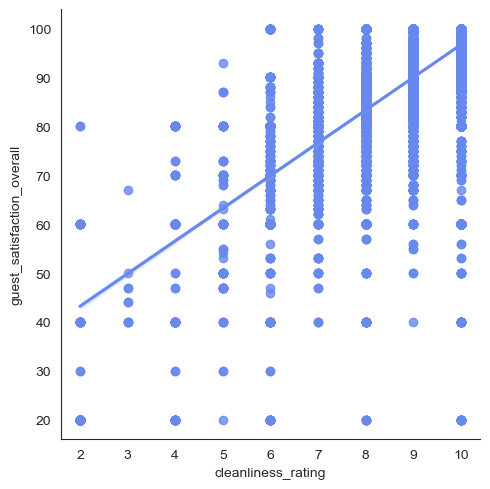

In [33]:
sns.lmplot(x = 'cleanliness_rating', y = 'guest_satisfaction_overall', data = eda_data)

###### it looks like cleanliness is an important factor for most guests

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


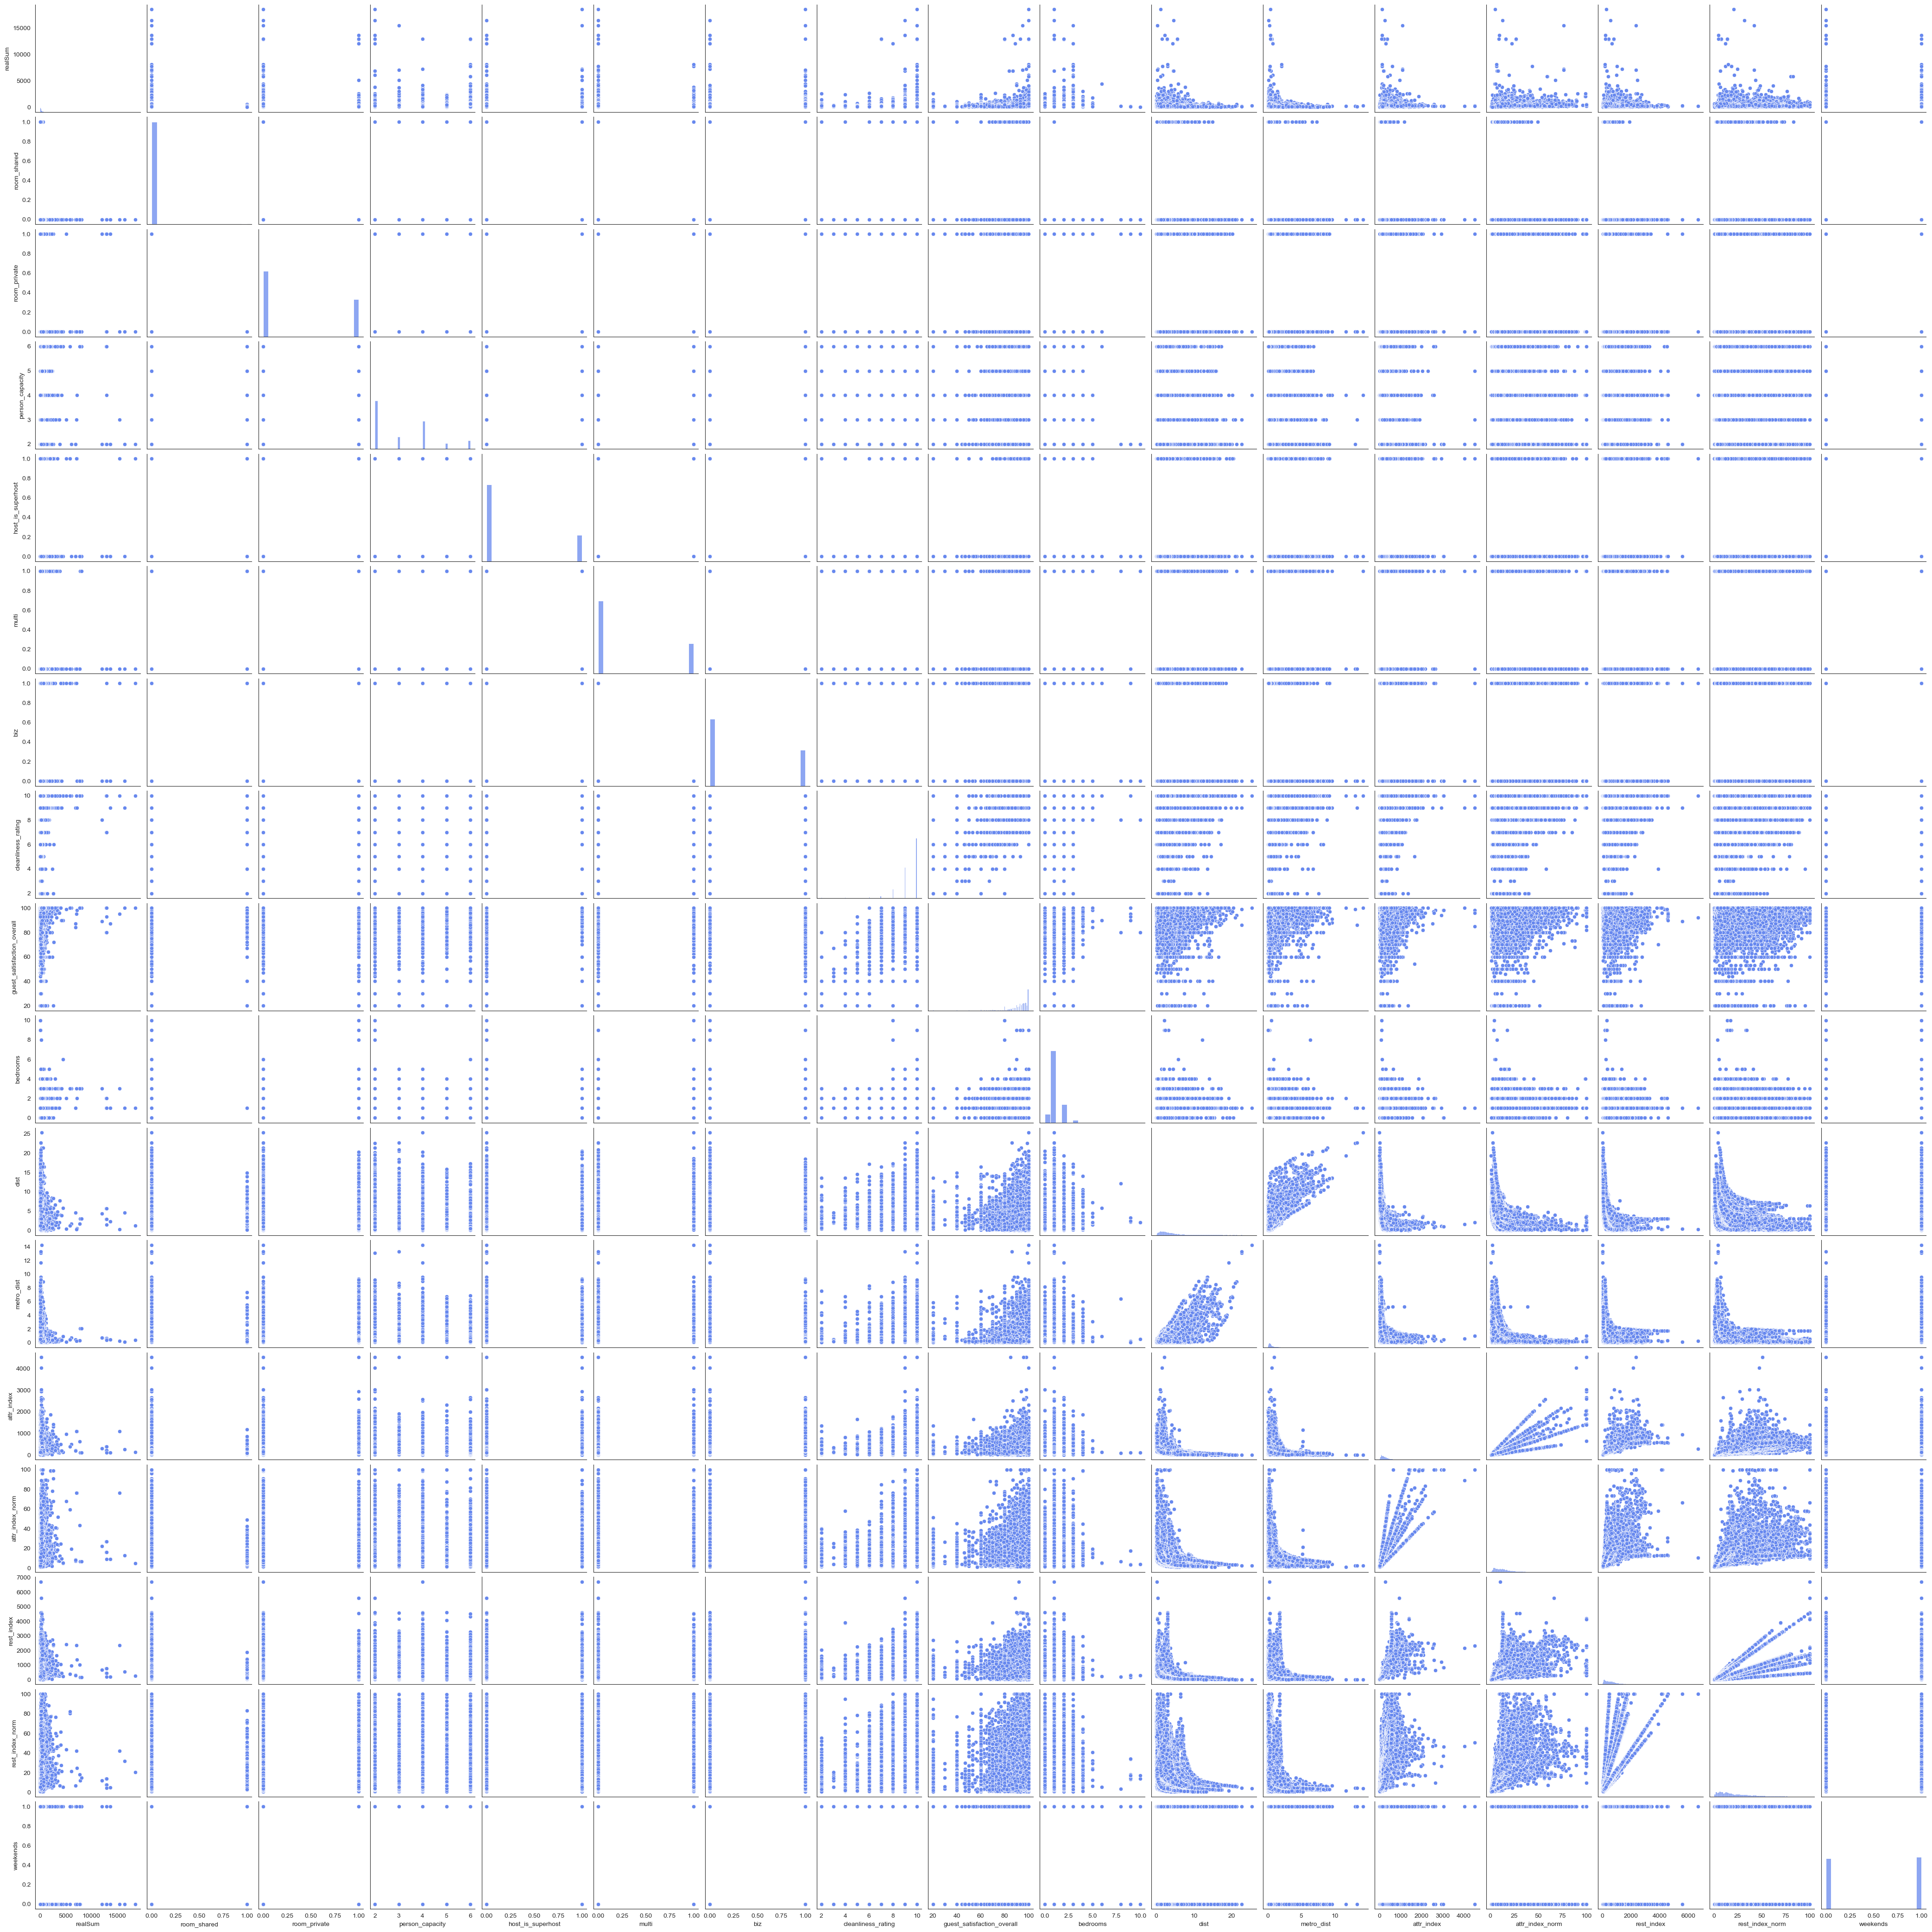

In [34]:
# creating pairplot 

corr_prob = eda_data[['person_capacity','room_private','rest_index','attr_index','bedrooms','multi','biz','dist']]

sns.pairplot(eda_data)

###### there are a couple of takeaways from the pairplot:
###### - there seem to be a lot of outliers in several variables, so that will need to be addressed 
###### - there seem to be no intermidiary dist/ metro dist airbnbs
###### - looking at the first column reveals to us some of the main characteristics of an expensive airbnb

<AxesSubplot: xlabel='realSum', ylabel='Count'>

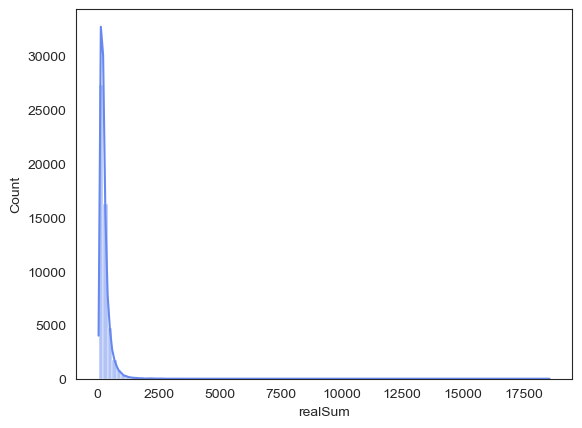

In [40]:
# looking at prices overall 
sns.histplot(eda_data['realSum'], bins = 100, kde = True)

###### it looks like there are a lot of outliers that will need to be removed later on 

<AxesSubplot: ylabel='realSum'>

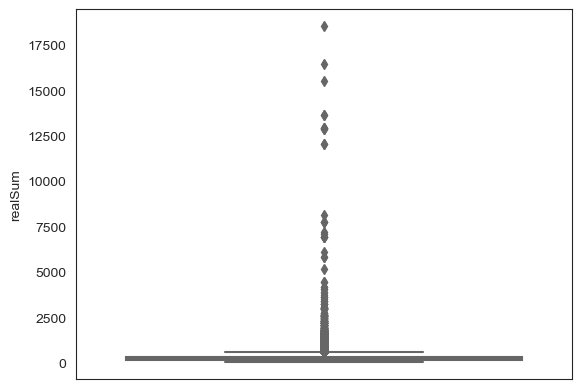

In [42]:
# creating a boxplot to get a better sense of the outliers

sns.boxplot(y = eda_data['realSum'])

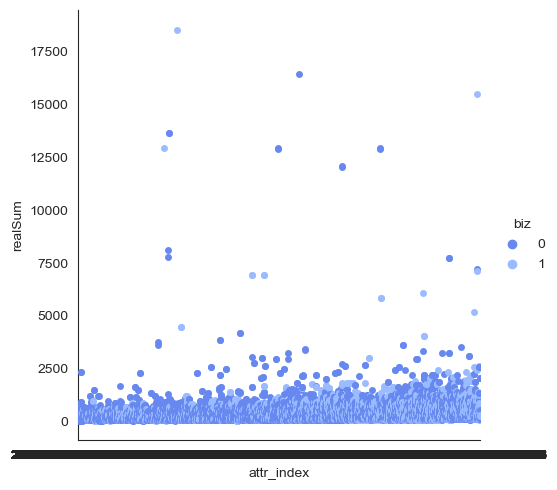

In [36]:
# creating a categorical plot for the biz variable

sns.catplot(x="attr_index", y="realSum", hue="biz", data=eda_data)